# KaggleInClass project

In this competition, you will be challenged to predict the number of shares an article will get on social media, from the article's topic, length, day of publication, and many other features.

You are given labels, that is, number of shares, for 5000 of these articles; your task is to predict labels for the remaining 2000 articles.

In [1]:
# load useful libraries
import pandas as pd
%pylab inline

from pandas import plotting
import seaborn as sn

from sklearn import preprocessing

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_log_error

from sklearn.model_selection import cross_val_predict

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Populating the interactive namespace from numpy and matplotlib


/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Data upload
First let's upload the different data infomations. 
We will upload the features, the training data in "feature_data", the training data labels in "target_data", and the testing data in "test_data" 

In [2]:
# we display the description of the features
!cat data/features.txt

nb_words_title  Number of words in the article's titles
nb_words_content  Number of words in the article
pp_uniq_words  Proportion of unique words in the article
pp_stop_words  Proportion of stop words (i.e. words predefined to be too common to be of use for interpretation or queries, such as 'the', 'a', 'and', etc.)
pp_uniq_non-stop_words  Proportion of non-stop words among unique words
nb_links  Number of hyperlinks in the article
nb_outside_links  Number of hyperlinks pointing to another website
nb_images  Number of images in the article
nb_videos  Number of videos in the article
ave_word_length  Average word length
nb_keywords  Number of keywords in the metadata
category  Category of the article: 0-Lifestyle, 1-Entertainment, 2-Business, 3-Web, 4-Tech, 5-World
nb_mina_mink  Minimum number of share counts among all articles with at least one keyword in common with the article
nb_mina_maxk  Minimum number of maximum share counts per keyword
nb_mina_avek  Minimum number of average sha

In [3]:
#upload of the features
feature_data = pd.read_csv('data/features.txt', header=None, sep="  ", names=['feature_names', 'feature_description'])
feature_data.head(5)

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,feature_names,feature_description
0,nb_words_title,Number of words in the article's titles
1,nb_words_content,Number of words in the article
2,pp_uniq_words,Proportion of unique words in the article
3,pp_stop_words,Proportion of stop words (i.e. words predefine...
4,pp_uniq_non-stop_words,Proportion of non-stop words among unique words


** Now, let's load and look at the distribution of number of shares (output). **

In [4]:
target_data = pd.read_csv('data/train-targets.csv', sep=",")
target_data.head(5)

,Id,Prediction
0,2000,882
1,2001,1102
2,2002,1102
3,2003,1001
4,2004,1603


According to the labels variying in <b>R</b>  we understang that is a regression problem. </n>
Let's visualize the histogram of the label to see their distribution

(0.0, 10000.0)

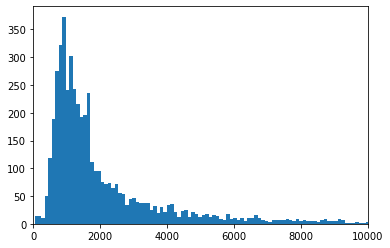

In [5]:
y_tr = target_data['Prediction'].values
plt.hist(y_tr,bins=2000)
plt.xlim((0,10000))

the distribution is somehow following a normal distribution

** Now, let's load and visualize the features. **

In [6]:
list_feature_names = list(feature_data['feature_names'])

train_data = pd.read_csv('data/train.csv', header=None, sep=" ", names=list_feature_names)
train_data.head(5)

,nb_words_title,nb_words_content,pp_uniq_words,pp_stop_words,pp_uniq_non-stop_words,nb_links,nb_outside_links,nb_images,nb_videos,ave_word_length,...,pp_neg_words,pp_pos_words_in_nonneutral,ave_polar_pos,min_polar_pos,max_polar_pos,ave_polar_neg,min_polar_neg,max_polar_neg,subj_title,polar_title
2000,9,843,0.5358,2.092000e-09,0.7469,15.0,8,11,1,4,...,0.019230,0.7143,0.4437,0.03333,1.0,-0.3160,-0.8000,-0.05,0.0,0.0
2001,9,805,0.4196,2.165000e-09,0.5693,8.0,7,1,0,4,...,0.025710,0.5349,0.3081,0.05000,0.8,-0.3463,-0.7143,-0.10,0.9,0.3
2002,8,145,0.7594,1.163000e-08,0.8488,7.0,3,0,2,4,...,0.007519,0.8333,0.3673,0.13640,0.5,-0.2000,-0.2000,-0.20,0.0,0.0
2003,12,201,0.6359,9.259000e-09,0.8148,7.0,2,0,0,4,...,0.027030,0.7368,0.3721,0.13640,0.6,-0.4000,-0.4000,-0.40,0.0,0.0
2004,13,673,0.4609,2.500000e-09,0.5950,8.0,7,1,0,4,...,0.021440,0.5625,0.3500,0.05000,0.6,-0.2435,-0.8000,-0.10,0.0,0.0


** Here we load the testing data **

In [7]:
test_data = pd.read_csv('data/test.csv', header=None, sep=" ", names=list_feature_names)
test_data.head(5)

,nb_words_title,nb_words_content,pp_uniq_words,pp_stop_words,pp_uniq_non-stop_words,nb_links,nb_outside_links,nb_images,nb_videos,ave_word_length,...,pp_neg_words,pp_pos_words_in_nonneutral,ave_polar_pos,min_polar_pos,max_polar_pos,ave_polar_neg,min_polar_neg,max_polar_neg,subj_title,polar_title
0,12,258,0.5745,6.897000e-09,0.6897,4.0,2,0,0,4,...,0.01653,0.7143,0.2967,0.10000,1.0,-0.2344,-0.3,-0.1875,0.125,0.0
1,8,11,0.0000,1.000000e+00,0.0000,0.0,0,0,0,0,...,0.00000,0.0000,0.0000,0.00000,0.0,0.0000,0.0,0.0000,0.525,0.3
2,10,263,0.7249,6.623000e-09,0.8543,6.0,3,2,0,5,...,0.04701,0.5000,0.2617,0.10000,1.0,-0.2170,-0.5,-0.1250,0.000,-0.2
3,13,1281,0.4067,1.422000e-09,0.5903,29.0,4,1,1,4,...,0.01512,0.7500,0.3585,0.03333,1.0,-0.2403,-0.5,-0.0500,0.000,0.0
4,9,107,0.8152,1.538000e-08,0.8154,5.0,2,0,0,4,...,0.02151,0.6667,0.4881,0.28570,1.0,-0.8000,-1.0,-0.6000,0.000,0.0


Let's explore a bit how the fetures describe the overall informations. 

In [8]:
train_data.describe()

,nb_words_title,nb_words_content,pp_uniq_words,pp_stop_words,pp_uniq_non-stop_words,nb_links,nb_outside_links,nb_images,nb_videos,ave_word_length,...,pp_neg_words,pp_pos_words_in_nonneutral,ave_polar_pos,min_polar_pos,max_polar_pos,ave_polar_neg,min_polar_neg,max_polar_neg,subj_title,polar_title
count,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,10.380000,562.619200,0.530260,3.020000e-02,0.672933,10.709400,7.42240,4.36960,1.234200,3.999000,...,0.016501,0.684178,0.354043,0.093984,0.757282,-0.254947,-0.514777,-0.104303,0.288572,0.071929
std,2.104777,465.785259,0.136349,1.711544e-01,0.152879,10.700498,9.79755,7.95729,3.952781,0.785062,...,0.010663,0.190982,0.104455,0.071783,0.246997,0.124528,0.290311,0.089427,0.323541,0.260094
min,4.000000,0.000000,0.000000,2.430000e-10,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,9.000000,265.000000,0.472275,2.379500e-09,0.627575,4.000000,1.00000,1.00000,0.000000,4.000000,...,0.009615,0.600000,0.307700,0.050000,0.600000,-0.324525,-0.700000,-0.125000,0.000000,0.000000
50%,10.000000,427.000000,0.539700,4.082000e-09,0.691700,7.000000,4.00000,1.00000,0.000000,4.000000,...,0.015115,0.714300,0.359000,0.100000,0.800000,-0.250100,-0.500000,-0.100000,0.200000,0.000000
75%,12.000000,724.250000,0.606725,6.667000e-09,0.754275,14.000000,10.00000,3.00000,1.000000,4.000000,...,0.021780,0.800000,0.411800,0.100000,1.000000,-0.182400,-0.300000,-0.050000,0.500000,0.160500
max,19.000000,7775.000000,1.000000,1.000000e+00,1.000000,162.000000,159.00000,128.00000,75.000000,7.000000,...,0.091040,1.000000,0.950000,0.900000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000


By doing this we can see that their is no missing informations, all the features have a count of 5000, but more importantly their is really important features such nb_words_content that describe a big variance (i.e hold a lot of informations) in comparison of the other features but it mean value it's also higher than the other. Hence we will need to standarized the values to avoid that this features bias the results since it will have a much higher weight. 

But before applying any transformation to the data. Let's explore the features and try to check if all of them are pertinent, the goal it's to remove the features we don't need and reduce the data dimensionality. This will give us better results and make the computation easier.

Some of the features we can remove are the correlated ones that have the lesser variance. for exemple if two features are correlated or nearly correlated which is more accurate here, we can remove one them since they are holding the same value. And to determine which one we can remove, we will compare their variance (i.e the informations they hold) and remove the one that have the lower one.


Let's start by computing the correlation matrix of the features

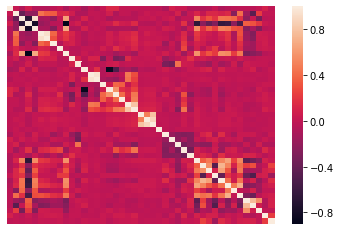

In [9]:
corrMatrix = train_data.corr()
sn.heatmap(corrMatrix, xticklabels=False, yticklabels=False)
plt.show()

The heatmap above illustrate the correlation between the feature. the brightest values (over >0.8) or the darkest (<-0.8) express the most correlated features. the diagonal hold only 1 values since each feature is fully correlated to itself.  

Now let's determine the most correlated features and compare their standard deviation. We will assume that the most correlated features have a absolute value higher than 0.8 

In [10]:
# return the indexes of the features that are highly correlated 
I,J=np.where((abs(corrMatrix) > 0.8) & (corrMatrix!=1))

#remove the dupplicate
for idx_I, elem_I in enumerate(I):
    idx_J = np.where(J == elem_I)
    idx_J = idx_J[0][0]
    if(I[idx_J]==J[idx_I]):
        J[idx_J]=0
        I[idx_J]=0
I=I[I!=0]
J=J[J!=0]

# get their names
I_features_name=train_data.columns.values[I]
J_features_name=train_data.columns.values[J]

std_feature_I=[]
std_feature_J=[]
correlation_list=[]

#compute their variance
for idx, elem in enumerate(I_features_name):
    correlation_list.append(corrMatrix.iloc[I[idx],J[idx]])
    std_feature_I.append(np.std(train_data[elem]))
    std_feature_J.append(np.std(train_data[J_features_name[idx]]))
    
#store them in a dictionary    
data_correlation = {'feature_1': I_features_name,
        'feature_2': J_features_name,
        'correlation_value': correlation_list,
        'std_feature_1': std_feature_I,
        'std_feature_2': std_feature_J}
#store them in a dataframe for the sake of the visualisation 
features_correlated_compar = pd.DataFrame(data_correlation, columns = ['feature_1','feature_2', 'correlation_value','std_feature_1', 'std_feature_2'])
 
print(features_correlated_compar)

       feature_1               feature_2  correlation_value  std_feature_1  \
0  pp_uniq_words  pp_uniq_non-stop_words           0.937697       0.136335   
1  pp_stop_words         ave_word_length          -0.898987       0.171137   
2       nb_links        nb_outside_links           0.939545      10.699428   
3   nb_mina_mink            nb_maxa_maxk          -0.860841      70.701093   
4   nb_mina_maxk            nb_mina_avek           0.949055    2515.322786   
5   nb_avea_maxk            nb_avea_avek           0.801864    4762.028495   
6  nb_max_linked           nb_ave_linked           0.884761   34293.993901   

   std_feature_2  
0       0.152864  
1       0.784983  
2       9.796570  
3  218895.020798  
4     426.475670  
5    1224.891423  
6   21193.796884  


from the informations above we can determine the 6 features we can remove:
<b>pp_uniq_words, pp_stop_words, nb_outside_links, nb_mina_mink, nb_mina_avek, nb_avea_avek, nb_ave_linked</b>

In [11]:
train_data=train_data.drop(['pp_uniq_words', 'pp_stop_words', 'nb_outside_links', 'nb_mina_mink', 'nb_mina_avek', 'nb_avea_avek', 'nb_ave_linked'], axis = 1)

Let's continue the transformation of our features. We will work on our categorical features such as <b><i>weekday</i></b> and <b><i>category</i></b>. 

Let's visualize first our weekday feature histogram

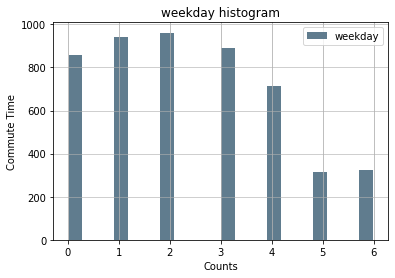

In [14]:
train_data.get(["weekday"]).plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('weekday histogram')
plt.xlabel('Counts')
plt.ylabel('Commute Time')
plt.grid(axis='y', alpha=0.75)

Here for exemple we can clearly see that during weekend there is less publications than during the week. We can for exemple binarize this features between 'working days' and holidays. But here we will try to get more precision by encoding our weekdays into categorical data. Unfortunatly their will be a downside to this: increasing the dimensionality of the data.

In [15]:
# Get the category data and encode it using a dummy categorical encoding
weekdays_data = pd.get_dummies(train_data['weekday'], prefix='weekday', drop_first=True)

# Get the rest of the data
other_data = train_data.drop(['weekday'], axis=1)

# Create a new data set by concatenation of the new weekday data and the old rest of the data
training_data = pd.concat([weekdays_data, other_data], axis=1)

# Print the created training data.
training_data.head(5)

,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,nb_words_title,nb_words_content,pp_uniq_non-stop_words,nb_links,...,pp_neg_words,pp_pos_words_in_nonneutral,ave_polar_pos,min_polar_pos,max_polar_pos,ave_polar_neg,min_polar_neg,max_polar_neg,subj_title,polar_title
2000,1,0,0,0,0,0,9,843,0.7469,15.0,...,0.019230,0.7143,0.4437,0.03333,1.0,-0.3160,-0.8000,-0.05,0.0,0.0
2001,0,1,0,0,0,0,9,805,0.5693,8.0,...,0.025710,0.5349,0.3081,0.05000,0.8,-0.3463,-0.7143,-0.10,0.9,0.3
2002,0,0,0,0,0,0,8,145,0.8488,7.0,...,0.007519,0.8333,0.3673,0.13640,0.5,-0.2000,-0.2000,-0.20,0.0,0.0
2003,0,1,0,0,0,0,12,201,0.8148,7.0,...,0.027030,0.7368,0.3721,0.13640,0.6,-0.4000,-0.4000,-0.40,0.0,0.0
2004,0,1,0,0,0,0,13,673,0.5950,8.0,...,0.021440,0.5625,0.3500,0.05000,0.6,-0.2435,-0.8000,-0.10,0.0,0.0


N.B: We could encode our weekday feature in a periodical way as below. But this will not help us a lot.  
As we see below the value are really spread between weekends and working days, there is no periodical relationship between the parameter for exemple between sunday and monday, so if we apply a periodical transformation to the data it will not help us.   

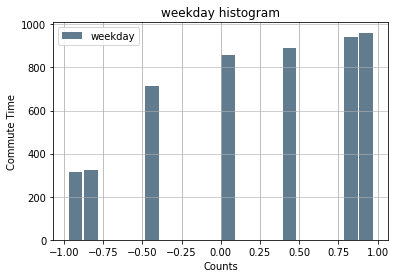

In [16]:
train_data_new = train_data.apply(lambda x: np.sin((2*math.pi*x)/7) if x.name == 'weekday' else x)

train_data_new.get(["weekday"]).plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('weekday histogram')
plt.xlabel('Counts')
plt.ylabel('Commute Time')
plt.grid(axis='y', alpha=0.75)

Let's apply the same encoding to the 'category'. 

In [17]:
# Get the category data and encode it using a dummy categorical encoding
category_data = pd.get_dummies(train_data['category'], prefix='category', drop_first=True)

# Get the rest of the data
other_data = training_data.drop(['category'], axis=1)

# Create a new data set by concatenation of the new weekday data and the old rest of the data
training_data = pd.concat([category_data, other_data], axis=1)

# Print the created training data.
training_data.head(5)

,category_1,category_2,category_3,category_4,category_5,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,...,pp_neg_words,pp_pos_words_in_nonneutral,ave_polar_pos,min_polar_pos,max_polar_pos,ave_polar_neg,min_polar_neg,max_polar_neg,subj_title,polar_title
2000,1,0,0,0,0,1,0,0,0,0,...,0.019230,0.7143,0.4437,0.03333,1.0,-0.3160,-0.8000,-0.05,0.0,0.0
2001,0,0,0,0,1,0,1,0,0,0,...,0.025710,0.5349,0.3081,0.05000,0.8,-0.3463,-0.7143,-0.10,0.9,0.3
2002,0,0,0,1,0,0,0,0,0,0,...,0.007519,0.8333,0.3673,0.13640,0.5,-0.2000,-0.2000,-0.20,0.0,0.0
2003,0,0,0,1,0,0,1,0,0,0,...,0.027030,0.7368,0.3721,0.13640,0.6,-0.4000,-0.4000,-0.40,0.0,0.0
2004,0,0,0,0,1,0,1,0,0,0,...,0.021440,0.5625,0.3500,0.05000,0.6,-0.2435,-0.8000,-0.10,0.0,0.0


We should not forget to apply the same transformation to the test data.

In [18]:
#drop the unsusefull features
test_data=test_data.drop(['pp_uniq_words', 'pp_stop_words', 'nb_outside_links', 'nb_mina_mink', 'nb_mina_avek', 'nb_avea_avek', 'nb_ave_linked'], axis = 1)

# Get the category data and encode it using a dummy categorical encoding
weekdays_data = pd.get_dummies(test_data['weekday'], prefix='weekday', drop_first=True)

# Get the rest of the data
other_data = test_data.drop(['weekday'], axis=1)

# Create a new data set by concatenation of the new weekday data and the old rest of the data
test_data = pd.concat([weekdays_data, other_data], axis=1)

# Get the category data and encode it using a dummy categorical encoding
category_data = pd.get_dummies(test_data['category'], prefix='category', drop_first=True)

# Get the rest of the data
other_data = test_data.drop(['category'], axis=1)

# Create a new data set by concatenation of the new weekday data and the old rest of the data
test_data = pd.concat([category_data, other_data], axis=1)

# Print the created test data.
test_data.head(5)

,category_1,category_2,category_3,category_4,category_5,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,...,pp_neg_words,pp_pos_words_in_nonneutral,ave_polar_pos,min_polar_pos,max_polar_pos,ave_polar_neg,min_polar_neg,max_polar_neg,subj_title,polar_title
0,0,0,0,0,1,0,0,0,0,0,...,0.01653,0.7143,0.2967,0.10000,1.0,-0.2344,-0.3,-0.1875,0.125,0.0
1,0,0,0,0,1,0,1,0,0,0,...,0.00000,0.0000,0.0000,0.00000,0.0,0.0000,0.0,0.0000,0.525,0.3
2,0,0,0,0,1,0,0,1,0,0,...,0.04701,0.5000,0.2617,0.10000,1.0,-0.2170,-0.5,-0.1250,0.000,-0.2
3,0,0,0,1,0,0,0,0,0,0,...,0.01512,0.7500,0.3585,0.03333,1.0,-0.2403,-0.5,-0.0500,0.000,0.0
4,0,0,0,0,1,0,1,0,0,0,...,0.02151,0.6667,0.4881,0.28570,1.0,-0.8000,-1.0,-0.6000,0.000,0.0


In our regression problem here, we have many features expressed as continuous independent variables evolving in different scales, standardizing our data might be usefull. If we do not their contributions to the model may not be equal, since the features with higher values range will have a much important weight and this may biased our model. Especially if we use distance based models such as the ridge regression that we will use below.

In [19]:
# Create a standardizer object and fit it to the training data.
std_scale = preprocessing.StandardScaler().fit(training_data)

# Apply the standardization to the training and the test data.
training_data_std = std_scale.transform(training_data)
test_data_std = std_scale.transform(test_data)

Note that the standarization take in account only the training data, with that we avoid leaking of a small amount of information from test to train and hence biasing our model. 

## Model selection

 In this section, we will start our model selection.

### 1. Parametric models

We will first try two different but simple linear model whitout tuning their hyperparameters just to have a quick overview on their behavior. A logistic regression with and without a ridge regularization.

First let's start with the <b>non regularized logistic regression</b>.

We set up first a <b>Kfold</b> to cross validate our model. It will help un to better evaluate it.

In [20]:
# set up folds for cross_validation
folds_regr = StratifiedKFold(n_splits=5, shuffle=True)

Note that we have used a Stratified KFold so that the different folds have the same proportion of the different sample. Hence we will have a better overall estimation of our model.

let's initialize our model :

In [21]:
# Initialize a LogisticRegression model. saga:5min 0.8 default:10min 0.9, lbfgs: 30sec 0.44
logreg = linear_model.LogisticRegression(random_state=0, penalty="none", solver="lbfgs")

#cross validate the model
score=cross_val_score(logreg, training_data_std, y_tr, scoring="neg_mean_squared_log_error", cv=folds_regr, n_jobs=-1)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Note: I tried different solver "saga", "sag", "lbfgs", "liblinear" none of them were converging and their computational time was high (more than 5min per fold). The only one that was ok is "lfbgs" (30sec per fold) but as said before is not converging.    

In [22]:
#rmsle score of the model
rmsle_logreg=math.sqrt(abs(np.average(score)))

print(rmsle_logreg)

1.1220226166895477


Now let's cross validate the <b>l2 regularized logistic regression model</b>.

In [23]:
# Initialize a LogisticRegression model. saga:5min 0.8 default:10min 0.9, lbfgs: 30sec 0.44
logreg_l2 = linear_model.LogisticRegression(random_state=0, penalty="l2", solver="lbfgs")


#cross validate the model
score=cross_val_score(logreg_l2, training_data_std, y_tr, scoring="neg_mean_squared_log_error", cv=folds_regr, n_jobs=-1)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [24]:
#rmsle score of the model
rmsle_logreg_l2=math.sqrt(abs(np.average(score)))

print(rmsle_logreg_l2)

1.0862326656072412


as shown above their two score are quite similar. To have a better model we will try to thune the hyperparameters of our ridge regression. 

For that we will use a <b>grid Search cross validation</b> to try different combination of hyperparameters and evaluate their performane. Then we will select the best model.

Now let's select the best hyperparam <b>'C'</b> (i.e the regularization coef) for the <b>ridge logistic regression</b>.

In [25]:
# Create a range of values to test for the parameter C
cvalues_list = np.logspace(-5, 1, 20)
print(cvalues_list)

[1.00000000e-05 2.06913808e-05 4.28133240e-05 8.85866790e-05
 1.83298071e-04 3.79269019e-04 7.84759970e-04 1.62377674e-03
 3.35981829e-03 6.95192796e-03 1.43844989e-02 2.97635144e-02
 6.15848211e-02 1.27427499e-01 2.63665090e-01 5.45559478e-01
 1.12883789e+00 2.33572147e+00 4.83293024e+00 1.00000000e+01]


In [26]:
# Optimize cvalue
classifier = linear_model.LogisticRegression(penalty='l2', solver="lbfgs")
param_grid = {'C': cvalues_list
             }
reg_l2_opt = GridSearchCV(classifier, 
                                param_grid, 
                                cv=folds_regr,
                                scoring="neg_mean_squared_log_error",
                                n_jobs=-1)     
reg_l2_opt.fit(training_data_std, y_tr)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=Fals...
       1.83298071e-04, 3.79269019e-04, 7.84759970e-04, 1.62377674e-03,
       3.35981829e-03, 6.95192796e-03, 1.43844989e-02, 2.97635144e-02,
       6.15848211e-02, 1.27427499e-01, 2.63665090e-01, 5.45559478e-01,
       1.12883789e+00, 2.33572147e+00, 4.83293024e+00, 1.00000000e+01])},
             pre_disp

In [41]:
# get mean scores of the best model
best_score=reg_l2_opt.best_score_
print("best_score ", best_score)
# optimal value of C
cvalue_opt = dict(reg_l2_opt.best_estimator_.get_params(deep=False).items())['C']
rmsle_logreg_l2_opt=math.sqrt(abs(best_score))

print("Scaled, l2 regularization (C=%.2e): rmsle = %.3f" % (cvalue_opt, 
                                                               rmsle_logreg_l2_opt))

logreg_l2_opt=reg_l2_opt.best_estimator_

best_score  -0.9317381705802109
Scaled, l2 regularization (C=6.16e-02): rmsle = 0.965


As expected the score is slightly better now, but let's see if we can find a better model. For this we will try some non parametric model.

### 2. non parametric models

first let's try the <b>SVM</b> (support vector Machine) with a <b>Radial Basis Function</b> (RBF) kernel. Since it's a regression problem we will use the fonction SVR(support vector regression) instead of SVC(support vector classification)

Here we just try the model with random or default hyperparameters to see how it behave. We will thune them later with a search grid cross validation.

In [42]:
svr=SVR(C=1.0, kernel="rbf", gamma=1e-2)

#cross validate the model
score=cross_val_score(svr, training_data_std, y_tr, scoring="neg_mean_squared_log_error", cv=folds_regr, n_jobs=-1)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [43]:
#rmsle score of the model
rmsle_svr=math.sqrt(abs(np.average(score)))

print(rmsle_svr)

0.9356206387182059


As shown in the score above, even if the hyperparameters are choosen randomly, the score is better that the ridge regression which is a good indicator. Let's see if we can do better.

In [44]:
# choisir 6 valeurs pour C, entre 1e-2 et 1e3
C_range = np.logspace(-2, 3, 6)

# choisir 4 valeurs pour gamma, entre 1e-2 et 10
gamma_range = np.logspace(-2, 1, 4)

# choisir 4 valeurs pour epsilon, entre 1e-2 et 10
epsilon_range = np.logspace(-2, 1, 4)

# grille de paramètres
parameters = {'C': C_range, 'gamma': gamma_range, 'epsilon':epsilon_range}


In [45]:
# initialize a model
svr_rbf = SVR(kernel='rbf')

# initialize cross validation
clf = GridSearchCV(estimator=svr_rbf, 
                   param_grid=parameters,
                   cv=folds_regr,
                   scoring="neg_mean_squared_log_error",
                   n_jobs=-1)

# run the cross validation using train dataset
clf.fit(training_data_std, y_tr)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'epsilon': array([ 0.01,  0.1 ,  1.  , 10.  ]),
                         'gamma': array([ 0.01,  0.1 ,  1.  , 10.  ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_log_error', verbose=0)

In [46]:
# get mean scores of the best model
best_score=clf.best_score_
print("best_score ", best_score)
# optimal value of C
cvalue_opt = dict(clf.best_estimator_.get_params(deep=False).items())['C']
gamma_opt = dict(clf.best_estimator_.get_params(deep=False).items())['gamma']
epsilon_opt = dict(clf.best_estimator_.get_params(deep=False).items())['epsilon']
rmsle_svr_rbf_opt=math.sqrt(abs(best_score))

print("Scaled, SVM rbf kernel (C=%.2e), (gamma=%.3f), (epsilon=%.3f): rmsle = %.3f" % (cvalue_opt, 
                                                gamma_opt,
                                                epsilon_opt,
                                                rmsle_svr_rbf_opt))
regr_svr_rbf_opt=clf.best_estimator_

best_score  -0.7760634449673002
Scaled, SVM rbf kernel (C=1.00e+03), (gamma=0.010), (epsilon=10.000): rmsle = 0.881


Well as shown above the grid search allow us to select better hyperparameters for the model, we even reach a higher score than before. good news! 

Now let's try the same <b>SVM</b> but with a <b>linear kernel</b>. Let's try it first with some default values.

In [47]:
#initialize a model
svr=SVR(C=1.0, kernel="linear")

#cross validate the model
score=cross_val_score(svr, training_data_std, y_tr, scoring="neg_mean_squared_log_error", cv=folds_regr, n_jobs=-1)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [48]:
#rmsle score of the model
rmsle_svr_lin=math.sqrt(abs(np.average(score)))

print(rmsle_svr_lin)

0.9017672978249661


The result is ok. Let's try to improve it by tuning <b>C</b> and <b>epsilon</b> with a grid search

In [49]:
# choisir 6 valeurs pour C, entre 1e-2 et 1e3
C_range = np.logspace(-2, 3, 6)

# choisir 4 valeurs pour epsilon, entre 1e-2 et 10
epsilon_range = np.logspace(-3, 1, 5)
# grille de paramètres
parameters = {'C': C_range, 'epsilon':epsilon_range}



In [50]:
# initialize a model
svr_lin = SVR(kernel='linear')

# initialize cross validation
clf = GridSearchCV(estimator=svr_lin, 
                   param_grid=parameters,
                   cv=folds_regr,
                   scoring="neg_mean_squared_log_error",
                    n_jobs=-1)

# run the cross validation using train dataset
clf.fit(training_data_std, y_tr)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated',
                           kernel='linear', max_iter=-1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'epsilon': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_log_error', verbose=0)

In [51]:
# get mean scores of the best model
best_score=clf.best_score_

# optimal value of C
c_value_opt = dict(clf.best_estimator_.get_params(deep=False).items())['C']
epsilon_opt=dict(clf.best_estimator_.get_params(deep=False).items())['epsilon']

rmsle_svr_lin_opt=math.sqrt(abs(best_score))

print("Scaled, SVM linear (C=%.2f), (epsilon=%.3f) rmsle=%.4f" % (c_value_opt, 
                                                epsilon_opt,
                                                rmsle_svr_lin_opt))
regr_svr_lin_opt=clf.best_estimator_

Scaled, SVM linear (C=1000.00), (epsilon=10.000) rmsle=0.8953


The result is slightly different from the SVM with an <b>exponential kernel (rbf)</b>

Let's try now a <b>random forest</b>

In [52]:
# initialize a model
rf=RandomForestRegressor(n_jobs=-1, n_estimators=80, max_features=0.5, min_samples_leaf=30 )

#cross validate the model
score=cross_val_score(rf, training_data_std, y_tr, scoring="neg_mean_squared_log_error", cv=folds_regr, n_jobs=-1)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [53]:
#rmsle score of the model
rmsle_rf=math.sqrt(abs(np.average(score)))

print(rmsle_rf)

1.0185782696476255


unfortunatly here the results are lower than expected. Let's try if we can do better by tuning the hyperparameters.

here are primarily 3 features which can be tuned to improve the predictive power of the model :

<b>1.a. max_features:</b>
These are the maximum number of features Random Forest is allowed to try in individual tree. Increasing max_features generally improves the performance of the model as at each node now we have a higher number of options to be considered. However, this is not necessarily true as this decreases the diversity of individual tree which is the USP of random forest. But, for sure, we decrease the speed of the algorithm by increasing the max_features. 

<b>1.b. n_estimators :</b>
This is the number of trees we want to build before taking the maximum voting or averages of predictions. Higher number of trees gives us better performance but makes our code slower. 
 
<b>1.c. min_sample_leaf :</b>
specifies the minimum number of samples required to be at a leaf node.
A smaller leaf makes the model more prone to capturing noise in train data. 

In [54]:
# Number of trees to use
list_n_trees = [500, 800, 1000, 1500]
max_features = [0.2, 0.3, 0.5, 0.7, 0.8]
list_min_sample_leaf=[10, 30, 50, 70]

# Define the grid of parameters to test
param_grid ={'n_estimators': list_n_trees, 'max_features':max_features, 'min_samples_leaf':list_min_sample_leaf }

# Initialize a GridSearchCV object that will be used to cross-validate
# a random forest with these parameters.
regr_rf = GridSearchCV(RandomForestRegressor(n_jobs=-1), 
                                    param_grid=param_grid,
                                    scoring='neg_mean_squared_log_error',
                                    cv=folds_regr,
                                    n_jobs=-1)
# run the cross validation using train dataset
regr_rf.fit(training_data_std, y_tr)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=-1,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn',

In [55]:
# get mean scores of the best model
best_score=regr_rf.best_score_
print("best_score ", best_score)
# optimal value of C
n_trees_opt = dict(regr_rf.best_estimator_.get_params(deep=False).items())['n_estimators']
max_features_opt = dict(regr_rf.best_estimator_.get_params(deep=False).items())['max_features']
min_sample_leaf_opt = dict(regr_rf.best_estimator_.get_params(deep=False).items())['min_samples_leaf']
rmsle_rf_opt=math.sqrt(abs(best_score))

print("Scaled, RF (nb_trees=%.2e), (max_features=%.3f), (min_sample_leaf=%.3f): rmsle = %.3f" % (n_trees_opt, 
                                                max_features_opt,
                                                min_sample_leaf_opt,
                                                rmsle_rf_opt))
regr_rf_opt=rf_best=regr_rf.best_estimator_

best_score  -1.0334853779084037
Scaled, RF (nb_trees=8.00e+02), (max_features=0.800), (min_sample_leaf=30.000): rmsle = 1.017


I have to say that I was expeting better result since the litterature says that this model work quite well with regression problems.

Let's try another approach  <b>Bagging trees</b>

First let's explore a simple <b>Bagging trees model</b> using a simple <b>SVM as a base estimator</b>. We will set up the hyperparameters later

In [56]:
#initialize the model
regr_br = BaggingRegressor(base_estimator=SVR(kernel='rbf'), n_estimators=300, max_features=0.3, max_samples=0.2, n_jobs=-1, random_state=0) 

In [57]:
score = cross_val_score(regr_br, training_data_std, y_tr, scoring="neg_mean_squared_log_error", cv=folds_regr, n_jobs=-1)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [58]:
#rmsle score of the model
rmsle_br=math.sqrt(abs(np.average(score)))

print(rmsle_br)

0.9358820042623099


At a first glance, the result is better than the random forest. let's see if we can to do better. Here the hyper parameters we can tune are:

<b>1.a. base estimator:</b>
the basic model used to train each tree.

<b>1.b. n_estimators :</b>
This is the number of trees we want to build before taking the maximum voting or averages of predictions. Higher number of trees gives us better performance but makes our code slower. 

<b>1.c. max_features :</b>
amount of features used to train each base estimator. 
 
<b>1.d. max_samples :</b>
amount of samples used to train each base estimator. 


In [59]:
# Number of trees to use
list_n_trees = [30, 40, 50, 60, 70] 
max_features = [0.1, 0.3, 0.5, 0.7]
max_samples=[0.2, 0.4, 0.6, 0.8]

# Define the grid of parameters to test
param_grid ={'n_estimators': list_n_trees, 'max_features':max_features, 'max_samples':max_samples}

# Initialize a GridSearchCV object that will be used to cross-validate
# a bagging trees with these parameters.
regr_br = GridSearchCV(BaggingRegressor(SVR(kernel='rbf'), n_jobs=-1, random_state=0), 
                                    param_grid=param_grid,
                                    scoring='neg_mean_squared_log_error',
                                    cv=folds_regr,
                                    n_jobs=-1)

# run the cross validation using train dataset
regr_br.fit(training_data_std, y_tr)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=SVR(C=1.0,
                                                           cache_size=200,
                                                           coef0=0.0, degree=3,
                                                           epsilon=0.1,
                                                           gamma='auto_deprecated',
                                                           kernel='rbf',
                                                           max_iter=-1,
                                                           shrinking=True,
                                                           tol=0.001,
                                                           verbose=False),
                                        bootstrap=True,
                                        bootstrap_features=False,
            

In [60]:
# get mean scores of the best model
best_score=regr_br.best_score_

# optimal value of C
n_trees_opt = dict(regr_br.best_estimator_.get_params(deep=False).items())['n_estimators']
max_features_opt = dict(regr_br.best_estimator_.get_params(deep=False).items())['max_features']
max_samples_opt = dict(regr_br.best_estimator_.get_params(deep=False).items())['max_samples']
base_estimator_opt=dict(regr_br.best_estimator_.get_params(deep=False).items())['base_estimator']

rmsle_br_opt=math.sqrt(abs(best_score))

print("Scaled, BR (nb_trees=%.2e), (max_features=%.3f), (max_samples=%.3f), (base_estimator=%.3s): rmsle = %.3f" % (n_trees_opt, 
                                                max_features_opt,
                                                max_samples_opt,
                                                base_estimator_opt,                                                                    
                                                rmsle_br_opt))
regr_br_opt=regr_br.best_estimator_


Scaled, BR (nb_trees=3.00e+01), (max_features=0.500), (max_samples=0.800), (base_estimator=SVR): rmsle = 0.933


I have to say that I was surprised when I got better results than the random forest with the bagging trees. Probably it's due to the use of an SVM as a base estimator.

I found an interesting model on the literatture called <b>Multivariate Adaptive Regression Splines</b> also known as <b>MARS</b> an approach that seems adapted to regression problems. MARS model, implemented by the Earth class, is a flexible regression method that automatically searches for interactions and non-linear relationships using hinge functions. Let's try it here.

Since it is not implement in scilit learn, the first step is to install the py-earth library.

In [61]:
pip install sklearn-contrib-py-earth

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Once installed, we can load the library and print the version in a Python script to confirm it was installed correctly.

In [62]:
# check pyearth version
import pyearth
# display version
print(pyearth.__version__)

0.1.0


A MARS model can be created with default model hyperparameters by creating an instance of the Earth class.

In [63]:
from pyearth import Earth
# define the model
model_mars = Earth()

Unfortunatly here this model give us <b>negative values for the prediction</b> so we cannot cross validate it using <b>the mean squared log error</b> as an evaluation metric since the log function only accept positive values. So we need to to use the absolute values of the prediction to compute the rmsle. To do so we need to generate a new scoring function as shown bellow.

In [64]:
def custom_rmsle_error(y_true, y_pred):
    return mean_squared_log_error(y_true, abs(y_pred))

In [65]:
#evaluation of the model
score = cross_val_score(model_mars, training_data_std, y_tr, scoring=make_scorer(custom_rmsle_error, greater_is_better=False), cv=folds_regr, n_jobs=-1)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [66]:
#rmsle score of the model
rmsle_mars=math.sqrt(abs(np.average(score)))

print(rmsle_mars)

1.0546180920504296


I tried to tune it's hyperparameters using a gridSearch but the computational time explose when we try a higher degree than 1. after 30min of waiting to generate a model with max_term=100 and max_degree=2 I got lower result than the simpliest model max_term=50 and max_degree=1. Lack of time and patience I assumed that the best parameters here are for max_degree=1 and max_term=50

For last i'll try the <b>gradient Boosting algorithm</b>. Since it also generate negative predective values we will use the customise scoring function we used for <b>MARS</b>.

In [67]:
#initialize the model
regr_gb = GradientBoostingRegressor(random_state=0)

In [68]:
# compute the score 
score = cross_val_score(regr_gb, training_data_std, y_tr, scoring=make_scorer(custom_rmsle_error, greater_is_better=False), cv=folds_regr, n_jobs=-1)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [69]:
#rmsle score of the model
rmsle_gb=math.sqrt(abs(np.average(score)))

print(rmsle_gb)

1.043556608256238


We runned first the the alfgorithm with the default value and we got a bad score. let's see if we can do better with the hyperparameters tuning. 

In [70]:
regr_gb.get_params

<bound method BaseEstimator.get_params of GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)>

In [71]:
# Number of trees to use
list_n_trees = [100, 300, 500, 700, 900, 1000] 
max_features =[0.1, 0.3, 0.5, 0.7]
min_samples_leaf=[1, 2, 5, 10]
max_depth=[2, 3, 4]
subsample= [0.001, 0.01, 0.1]
min_weight_fraction_leaf=[0, 0.1, 0.15, 0.2]
learning_rate=[ 0.01, 0.05 ,0.1, 0.15]

# Define the grid of parameters to test
param_grid ={'n_estimators': list_n_trees, 'max_features':max_features, 'min_samples_leaf':min_samples_leaf, 'max_depth':max_depth, 'subsample': subsample, 'min_weight_fraction_leaf': min_weight_fraction_leaf, 'learning_rate': learning_rate}

# Initialize a GridSearchCV object that will be used to cross-validate
# a bagging trees with these parameters.
regr_gb = GridSearchCV(GradientBoostingRegressor(random_state=0), 
                                    param_grid=param_grid,
                                    scoring=make_scorer(custom_rmsle_error, greater_is_better=False),
                                    cv=folds_regr,
                                    n_jobs=-1)

# run the cross validation using train dataset
regr_gb.fit(training_data_std, y_tr)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_spl...
                                                 verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.15],

In [72]:
# get mean scores of the best model
best_score=regr_gb.best_score_

# optimal value of C
n_trees_opt = dict(regr_gb.best_estimator_.get_params(deep=False).items())['n_estimators']
max_features_opt = dict(regr_gb.best_estimator_.get_params(deep=False).items())['max_features']
min_samples_leaf_opt = dict(regr_gb.best_estimator_.get_params(deep=False).items())['min_samples_leaf']
max_depth_opt=dict(regr_gb.best_estimator_.get_params(deep=False).items())['max_depth']
subsample_opt=dict(regr_gb.best_estimator_.get_params(deep=False).items())['subsample']
min_weight_fraction_leaf_opt=dict(regr_gb.best_estimator_.get_params(deep=False).items())['min_weight_fraction_leaf']
learning_rate_opt=dict(regr_gb.best_estimator_.get_params(deep=False).items())['learning_rate']



rmsle_gb_opt=math.sqrt(abs(best_score))

print("Scaled, GB (nb_trees=%.2e), (max_features=%.3f), (min_samples_leaf_opt=%.3f), (max_depth_opt=%.3f), (subsample_opt=%f), (min_weight_fraction_leaf=%f), (learning_rate=%.3f) : rmsle = %.3f" % 
                                                (n_trees_opt, 
                                                max_features_opt,
                                                min_samples_leaf_opt,
                                                max_depth_opt,
                                                subsample_opt,
                                                min_weight_fraction_leaf_opt,
                                                learning_rate_opt,
                                                rmsle_gb_opt))
regr_gb_opt=regr_gb.best_estimator_


Scaled, GB (nb_trees=7.00e+02), (max_features=0.100), (min_samples_leaf_opt=5.000), (max_depth_opt=2.000), (subsample_opt=0.001000), (min_weight_fraction_leaf=0.000000), (learning_rate=0.150) : rmsle = 1.251


We' ve got a slightly better result but nothing special. 

Let's resume our result in a dataframe shown below.

In [73]:
data = [['Ridge logistic reg',{'C': logreg_l2_opt.get_params(deep=False)['C']}, rmsle_logreg_l2_opt],
        ['SVM-rbf',{'C': regr_svr_rbf_opt.get_params(deep=False)['C'], 'gamma': regr_svr_rbf_opt.get_params(deep=False)['gamma'], 'epsilon': regr_svr_rbf_opt.get_params(deep=False)['epsilon'] }, rmsle_svr_rbf_opt],
        ['SVM-linear',{'C': regr_svr_lin_opt.get_params(deep=False)['C'], 'epsilon': regr_svr_lin_opt.get_params(deep=False)['epsilon']}, rmsle_svr_lin_opt],
        ['Random Forest',{'max_features': regr_rf_opt.get_params(deep=False)['max_features'], 'n_estimators': regr_rf_opt.get_params(deep=False)['n_estimators'], 'min_samples_leaf': regr_rf_opt.get_params(deep=False)['min_samples_leaf'] }, rmsle_rf_opt],
        ['Bagging',{'base_estimator': regr_br_opt.get_params(deep=False)['base_estimator'], 'max_features': regr_br_opt.get_params(deep=False)['max_features'], 'n_estimators': regr_br_opt.get_params(deep=False)['n_estimators'], 'max_samples': regr_br_opt.get_params(deep=False)['max_samples'] }, rmsle_br_opt],
        ['MARS', {'max_degree': [model_mars.get_params(deep=False)['max_degree'] ,"default: 1"] , 'max_terms': [model_mars.get_params(deep=False)['max_terms'], "default: min(2 * nb_features + nb_rows // 10, 400)"]}, rmsle_mars ],
        ['Gradient Boosting',{'n_estimators': regr_gb_opt.get_params(deep=False)['n_estimators'], 'max_features': regr_gb_opt.get_params(deep=False)['max_features'], 'min_samples_leaf': regr_gb_opt.get_params(deep=False)['min_samples_leaf'],  'max_depth': regr_gb_opt.get_params(deep=False)['max_depth'], 'subsample': regr_gb_opt.get_params(deep=False)['subsample'], 'min_weight_fraction_leaf': regr_gb_opt.get_params(deep=False)['min_weight_fraction_leaf'], 'learning_rate': regr_gb_opt.get_params(deep=False)['learning_rate']}, rmsle_gb_opt]]
df = pd.DataFrame(data,columns=['model','Parameters', 'RMSLE'])
df


,model,Parameters,RMSLE
0,Ridge logistic reg,{'C': 0.06158482110660261},0.965266
1,SVM-rbf,"{'C': 1000.0, 'gamma': 0.01, 'epsilon': 10.0}",0.880945
2,SVM-linear,"{'C': 1000.0, 'epsilon': 10.0}",0.895285
3,Random Forest,"{'max_features': 0.8, 'n_estimators': 800, 'mi...",1.016605
4,Bagging,"{'base_estimator': SVR(C=1.0, cache_size=200, ...",0.933091
5,MARS,"{'max_degree': [None, 'default: 1'], 'max_term...",1.054618
6,Gradient Boosting,"{'n_estimators': 700, 'max_features': 0.1, 'mi...",1.250970


## Dimensionality Reduction

In this section we will apply a <b>PCA</b> to our data to reduce their dimensionality and rerun to most accurate of our above models. 

In [74]:
from sklearn import decomposition

#compute our PCA and fit it to the scaled data
pca = decomposition.PCA(n_components=0.95)
pca.fit(training_data_std)

pca.n_components_

32

We have selected the components that explain <b>95% of the variance</b> (i.e informations). let's visualize how much variance each of them hold. 

Text(0, 0.5, 'Fraction of variance explained')

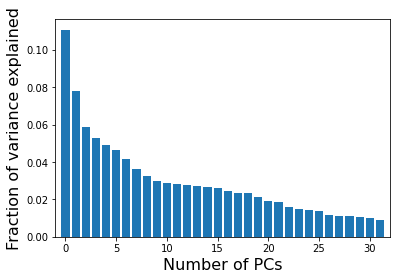

In [75]:
plt.bar(np.arange(32), pca.explained_variance_ratio_)
plt.xlim([-1, 32])
plt.xlabel("Number of PCs", fontsize=16)
plt.ylabel("Fraction of variance explained", fontsize=16)

let's project our data in these Principal components 

In [76]:
X_train_projected = pca.transform(training_data_std)
X_test_projected = pca.transform(test_data_std)

Now let's train again our best previous model on our reduced dimensions.

let's start with the <b>ridge regressor</b>

In [77]:
# Initialize a LogisticRegression model. saga:5min 0.8 default:10min 0.9, lbfgs: 30sec 0.44
logreg_l2_pca = linear_model.LogisticRegression(random_state=0, penalty="l2", solver="lbfgs")


#cross validate the model
score=cross_val_score(logreg_l2_pca, X_train_projected, y_tr, scoring="neg_mean_squared_log_error", cv=folds_regr, n_jobs=-1)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [78]:
#rmsle score of the model
rmsle_logreg_l2_pca=math.sqrt(abs(np.average(score)))

print(rmsle_logreg_l2_pca)

1.1121792724393915


as shown above their two score are quite similar. To have a better model we will try to thune the hyperparameters of our ridge regression. 

For that we will use a <b>grid Search cross validation</b> to try different combination of hyperparameters and evaluate their performane. Then we will select the best model.

Now let's select the best hyperparam <b>'C'</b> (i.e the regularization coef) for the <b>ridge logistic regression</b>.

In [79]:
# Create a range of values to test for the parameter C
cvalues_list = np.logspace(-5, 1, 20)
print(cvalues_list)

[1.00000000e-05 2.06913808e-05 4.28133240e-05 8.85866790e-05
 1.83298071e-04 3.79269019e-04 7.84759970e-04 1.62377674e-03
 3.35981829e-03 6.95192796e-03 1.43844989e-02 2.97635144e-02
 6.15848211e-02 1.27427499e-01 2.63665090e-01 5.45559478e-01
 1.12883789e+00 2.33572147e+00 4.83293024e+00 1.00000000e+01]


In [80]:
# Optimize cvalue
classifier = linear_model.LogisticRegression(penalty='l2', solver="lbfgs")
param_grid = {'C': cvalues_list
             }
reg_l2_opt_pca = GridSearchCV(classifier, 
                                param_grid, 
                                cv=folds_regr,
                                scoring="neg_mean_squared_log_error",
                                n_jobs=-1)     
reg_l2_opt_pca.fit(X_train_projected, y_tr)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=Fals...
       1.83298071e-04, 3.79269019e-04, 7.84759970e-04, 1.62377674e-03,
       3.35981829e-03, 6.95192796e-03, 1.43844989e-02, 2.97635144e-02,
       6.15848211e-02, 1.27427499e-01, 2.63665090e-01, 5.45559478e-01,
       1.12883789e+00, 2.33572147e+00, 4.83293024e+00, 1.00000000e+01])},
             pre_disp

In [81]:
# get mean scores of the best model
best_score=reg_l2_opt_pca.best_score_
print("best_score ", best_score)
# optimal value of C
cvalue_opt = dict(reg_l2_opt_pca.best_estimator_.get_params(deep=False).items())['C']
rmsle_logreg_l2_opt_pca=math.sqrt(abs(best_score))

print("Scaled, l2 regularization (C=%.2e): rmsle = %.3f" % (cvalue_opt, 
                                                               rmsle_logreg_l2_opt_pca))

logreg_l2_opt_pca=reg_l2_opt_pca.best_estimator_

best_score  -0.9289863491575551
Scaled, l2 regularization (C=6.16e-02): rmsle = 0.964


As expected the score is slightly better now, but let's see if we can find a better model. For this we will try some non parametric model.

first let's try the <b>SVM</b> (support vector Machine) with a <b>Radial Basis Function</b> (RBF) kernel. Since it's a regression problem we will use the fonction SVR(support vector regression) instead of SVC(support vector classification)

Here we just try the model with random or default hyperparameters to see how it behave. We will thune them later with a search grid cross validation.

In [82]:
svr_pca=SVR(C=1.0, kernel="rbf", gamma=1e-2)

#cross validate the model
score=cross_val_score(svr_pca, X_train_projected, y_tr, scoring="neg_mean_squared_log_error", cv=folds_regr, n_jobs=-1)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [83]:
#rmsle score of the model
rmsle_svr_pca=math.sqrt(abs(np.average(score)))

print(rmsle_svr_pca)

0.9346015447653586


As shown in the score above, even if the hyperparameters are choosen randomly, the score is better that the ridge regression which is a good indicator. Let's see if we can do better.

In [84]:
# choisir 6 valeurs pour C, entre 1e-2 et 1e3
C_range = np.logspace(-2, 3, 6)

# choisir 5 valeurs pour gamma, entre 1e-3 et 10
gamma_range = np.logspace(-3, 1, 6)

# choisir 6 valeurs pour epsilon, entre 1e-3 et 100
epsilon_range = np.logspace(-3, 2, 6)

# grille de paramètres
parameters = {'C': C_range, 'gamma': gamma_range, 'epsilon':epsilon_range}


In [85]:
# initialize a model
svr_rbf_pca = SVR(kernel='rbf')

# initialize cross validation
clf = GridSearchCV(estimator=svr_rbf_pca, 
                   param_grid=parameters,
                   cv=folds_regr,
                   scoring="neg_mean_squared_log_error",
                   n_jobs=-1)

# run the cross validation using train dataset
clf.fit(X_train_projected, y_tr)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'epsilon': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'gamma': array([1.00000000e-03, 6.30957344e-03, 3.98107171e-02, 2.51188643e-01,
       1.58489319e+00, 1.00000000e+01])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_log_error', verbose=0)

In [86]:
# get mean scores of the best model
best_score=clf.best_score_
print("best_score ", best_score)
# optimal value of C
cvalue_opt = dict(clf.best_estimator_.get_params(deep=False).items())['C']
gamma_opt = dict(clf.best_estimator_.get_params(deep=False).items())['gamma']
epsilon_opt = dict(clf.best_estimator_.get_params(deep=False).items())['epsilon']
rmsle_svr_rbf_opt_pca=math.sqrt(abs(best_score))

print("Scaled reduced, SVM rbf kernel (C=%.2e), (gamma=%.3f), (epsilon=%.3f): rmsle = %.3f" % (cvalue_opt, 
                                                gamma_opt,
                                                epsilon_opt,
                                                rmsle_svr_rbf_opt_pca))
regr_svr_rbf_opt_pca=clf.best_estimator_

best_score  -0.7756685443332929
Scaled reduced, SVM rbf kernel (C=1.00e+03), (gamma=0.040), (epsilon=100.000): rmsle = 0.881


Well as shown above the grid search allow us to select better hyperparameters for the model, we even reach a higher score than before. for now it's the best candidate we have 

let's continue here with the <b>SVM</b> with <b>linear kernel</b>

In [87]:
#initialize a model
svr_pca=SVR(C=1.0, kernel="linear")

#cross validate the model
score=cross_val_score(svr_pca, X_train_projected, y_tr, scoring="neg_mean_squared_log_error", cv=folds_regr, n_jobs=-1)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [88]:
#rmsle score of the model
rmsle_svr_lin_pca=math.sqrt(abs(np.average(score)))

print(rmsle_svr_lin_pca)

0.9035975537991217


The result is ok. Let's try to improve it by tuning <b>C</b> and <b>epsilon</b> with a grid search

In [89]:
# choisir 10 valeurs pour C, entre 1e-2 et 1e3
C_range = np.logspace(-2, 3, 10)

# choisir 10 valeurs pour epsilon, entre 1e-2 et 10
epsilon_range = np.logspace(-3, 1, 10)
# grille de paramètres
parameters = {'C': C_range, 'epsilon':epsilon_range}



In [90]:
# initialize a model
svr_lin_pca = SVR(kernel='linear')

# initialize cross validation
clf = GridSearchCV(estimator=svr_lin_pca, 
                   param_grid=parameters,
                   cv=folds_regr,
                   scoring="neg_mean_squared_log_error",
                    n_jobs=-1)

# run the cross validation using train dataset
clf.fit(X_train_projected, y_tr)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated',
                           kernel='linear', max_iter=-1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.00000000e-02, 3.59381366e-02, 1.29154967e...
       1.66810054e+00, 5.99484250e+00, 2.15443469e+01, 7.74263683e+01,
       2.78255940e+02, 1.00000000e+03]),
                         'epsilon': array([1.00000000e-03, 2.78255940e-03, 7.74263683e-03, 2.15443469e-02,
       5.99484250e-02, 1.66810054e-01, 4.64158883e-01, 1.29154967e+00,
       3.59381366e+00, 1.00000000e+01])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_log_error', verbose=0)

In [91]:
# get mean scores of the best model
best_score=clf.best_score_

# optimal value of C
c_value_opt = dict(clf.best_estimator_.get_params(deep=False).items())['C']
epsilon_opt=dict(clf.best_estimator_.get_params(deep=False).items())['epsilon']

rmsle_svr_lin_opt_pca=math.sqrt(abs(best_score))

print("Scaled reduced, SVM linear (C=%.2f), (epsilon=%.3f) rmsle=%.4f" % (c_value_opt, 
                                                epsilon_opt,
                                                rmsle_svr_lin_opt_pca))
regr_svr_lin_opt_pca=clf.best_estimator_

Scaled reduced, SVM linear (C=1000.00), (epsilon=0.167) rmsle=0.8973


The result is again slightly different from the SVM with an <b>exponential kernel (rbf)</b>

Let's continue our inspectation with the <b>random forest</b>

In [92]:
# initialize a model
rf=RandomForestRegressor(n_jobs=-1, n_estimators=80, max_features=0.5, min_samples_leaf=30 )

#cross validate the model
score=cross_val_score(rf, X_train_projected, y_tr, scoring="neg_mean_squared_log_error", cv=folds_regr, n_jobs=-1)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [93]:
#rmsle score of the model
rmsle_rf_pca=math.sqrt(abs(np.average(score)))

print(rmsle_rf_pca)

1.0421383790530816


unfortunatly here the results are lower than expected. Let's try if we can do better by tuning the hyperparameters.

In [94]:
# Number of trees to use
list_n_trees = [500, 800, 1000, 1500]
max_features = [0.2, 0.3, 0.5, 0.7, 0.8]
list_min_sample_leaf= [10, 30, 50, 70]

# Define the grid of parameters to test
param_grid ={'n_estimators': list_n_trees, 'max_features':max_features, 'min_samples_leaf':list_min_sample_leaf }

# Initialize a GridSearchCV object that will be used to cross-validate
# a random forest with these parameters.
regr_rf = GridSearchCV(RandomForestRegressor(n_jobs=-1), 
                                    param_grid=param_grid,
                                    scoring='neg_mean_squared_log_error',
                                    cv=folds_regr,
                                    n_jobs=-1)
# run the cross validation using train dataset
regr_rf.fit(X_train_projected, y_tr)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=-1,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn',

In [95]:
# get mean scores of the best model
best_score=regr_rf.best_score_
print("best_score ", best_score)
# optimal value of C
n_trees_opt = dict(regr_rf.best_estimator_.get_params(deep=False).items())['n_estimators']
max_features_opt = dict(regr_rf.best_estimator_.get_params(deep=False).items())['max_features']
min_sample_leaf_opt = dict(regr_rf.best_estimator_.get_params(deep=False).items())['min_samples_leaf']
rmsle_rf_opt_pca=math.sqrt(abs(best_score))

print("Scaled reduced, RF (nb_trees=%.2e), (max_features=%.3f), (min_sample_leaf=%.3f): rmsle = %.3f" % (n_trees_opt, 
                                                max_features_opt,
                                                min_sample_leaf_opt,
                                                rmsle_rf_opt_pca))
regr_rf_opt_pca=rf_best=regr_rf.best_estimator_

best_score  -1.0953312250306808
Scaled reduced, RF (nb_trees=8.00e+02), (max_features=0.500), (min_sample_leaf=30.000): rmsle = 1.047


As before the results are not that good

Now the  <b>Bagging trees</b>

First let's explore a simple <b>Bagging trees model</b> using a simple <b>SVM as a base estimator</b>. We will set up the hyperparameters later

In [96]:
#initialize the model
regr_br_pca = BaggingRegressor(base_estimator=SVR(kernel='rbf'), n_estimators=300, max_features=0.3, max_samples=0.2, n_jobs=-1, random_state=0) 

In [97]:
score = cross_val_score(regr_br_pca, X_train_projected, y_tr, scoring="neg_mean_squared_log_error", cv=folds_regr, n_jobs=-1)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [98]:
#rmsle score of the model
rmsle_br_pca=math.sqrt(abs(np.average(score)))

print(rmsle_br_pca)

0.935596181079028


Let's try to tune our hyperparameters.

In [99]:
# Number of trees to use
list_n_trees = [30, 40, 50, 60, 70] 
max_features = [0.1, 0.3, 0.5, 0.7]
max_samples= [0.2, 0.4, 0.6, 0.8]

# Define the grid of parameters to test
param_grid ={'n_estimators': list_n_trees, 'max_features':max_features, 'max_samples':max_samples}

# Initialize a GridSearchCV object that will be used to cross-validate
# a bagging trees with these parameters.
regr_br = GridSearchCV(BaggingRegressor(SVR(kernel='rbf'), n_jobs=-1, random_state=0), 
                                    param_grid=param_grid,
                                    scoring='neg_mean_squared_log_error',
                                    cv=folds_regr,
                                    n_jobs=-1)

# run the cross validation using train dataset
regr_br.fit(X_train_projected, y_tr)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=SVR(C=1.0,
                                                           cache_size=200,
                                                           coef0=0.0, degree=3,
                                                           epsilon=0.1,
                                                           gamma='auto_deprecated',
                                                           kernel='rbf',
                                                           max_iter=-1,
                                                           shrinking=True,
                                                           tol=0.001,
                                                           verbose=False),
                                        bootstrap=True,
                                        bootstrap_features=False,
            

In [100]:
# get mean scores of the best model
best_score=regr_br.best_score_

# optimal value of C
n_trees_opt = dict(regr_br.best_estimator_.get_params(deep=False).items())['n_estimators']
max_features_opt = dict(regr_br.best_estimator_.get_params(deep=False).items())['max_features']
max_samples_opt = dict(regr_br.best_estimator_.get_params(deep=False).items())['max_samples']
base_estimator_opt=dict(regr_br.best_estimator_.get_params(deep=False).items())['base_estimator']

rmsle_br_opt_pca=math.sqrt(abs(best_score))

print("Scaled reduced, BR (nb_trees=%.2e), (max_features=%.3f), (max_samples=%.3f), (base_estimator=%.3s): rmsle = %.3f" % (n_trees_opt, 
                                                max_features_opt,
                                                max_samples_opt,
                                                base_estimator_opt,                                                                    
                                                rmsle_br_opt_pca))
regr_br_opt_pca=regr_br.best_estimator_


Scaled reduced, BR (nb_trees=3.00e+01), (max_features=0.100), (max_samples=0.800), (base_estimator=SVR): rmsle = 0.933


The results are compared to the one before the PCA

Let's see what happen with <b>MARS</b>

In [129]:
#define model
model_mars_pca = Earth()

In [130]:
#evaluation of the model
score = cross_val_score(regr_br_pca, X_train_projected, y_tr, scoring=make_scorer(custom_rmsle_error, greater_is_better=False), cv=folds_regr, n_jobs=-1)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [131]:
#rmsle score of the model
rmsle_mars_pca=math.sqrt(abs(np.average(score)))

print(rmsle_mars_pca)

0.9360420526198067


As before I didn't tune the hyperparameters for the same reasons.

For last the <b>gradient Boosting algorithm</b>.

In [132]:
#initialize the model
regr_gb_pca = GradientBoostingRegressor(random_state=0)

In [133]:
# compute the score 
score = cross_val_score(regr_br_pca, X_train_projected, y_tr, scoring=make_scorer(custom_rmsle_error, greater_is_better=False), cv=folds_regr, n_jobs=-1)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [134]:
#rmsle score of the model
rmsle_gb_pca=math.sqrt(abs(np.average(score)))

print(rmsle_gb_pca)

0.9351594847741964


We runned first the the algorithm with the default value and we got a bad score. let's see if we can do better with the hyperparameters tuning. 

In [135]:
# Number of trees to use
list_n_trees = [100, 300, 500, 700, 900, 1000] 
max_features = [0.1, 0.3, 0.5, 0.7]
min_samples_leaf= [1, 2, 5, 10]
max_depth= [2, 3, 4]
subsample= [0.001, 0.01, 0.1]
min_weight_fraction_leaf= [0, 0.1, 0.15, 0.2]
learning_rate= [ 0.01, 0.05 ,0.1, 0.15]

# Define the grid of parameters to test
param_grid ={'n_estimators': list_n_trees, 'max_features':max_features, 'min_samples_leaf':min_samples_leaf, 'max_depth':max_depth, 'subsample': subsample, 'min_weight_fraction_leaf': min_weight_fraction_leaf, 'learning_rate': learning_rate}

# Initialize a GridSearchCV object that will be used to cross-validate
# a bagging trees with these parameters.
regr_gb = GridSearchCV(GradientBoostingRegressor(random_state=0), 
                                    param_grid=param_grid,
                                    scoring=make_scorer(custom_rmsle_error, greater_is_better=False),
                                    cv=folds_regr,
                                    n_jobs=-1)

# run the cross validation using train dataset
regr_gb.fit(X_train_projected, y_tr)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_spl...
                                                 verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.15],

In [136]:
# get mean scores of the best model
best_score=regr_gb.best_score_

# optimal value of C
n_trees_opt = dict(regr_gb.best_estimator_.get_params(deep=False).items())['n_estimators']
max_features_opt = dict(regr_gb.best_estimator_.get_params(deep=False).items())['max_features']
min_samples_leaf_opt = dict(regr_gb.best_estimator_.get_params(deep=False).items())['min_samples_leaf']
max_depth_opt=dict(regr_gb.best_estimator_.get_params(deep=False).items())['max_depth']
subsample_opt=dict(regr_gb.best_estimator_.get_params(deep=False).items())['subsample']
min_weight_fraction_leaf_opt=dict(regr_gb.best_estimator_.get_params(deep=False).items())['min_weight_fraction_leaf']
learning_rate_opt=dict(regr_gb.best_estimator_.get_params(deep=False).items())['learning_rate']



rmsle_gb_opt_pca=math.sqrt(abs(best_score))

print("Scaled reduced, GB (nb_trees=%.2e), (max_features=%.3f), (min_samples_leaf_opt=%.3f), (max_depth_opt=%.3f), (subsample_opt=%f), (min_weight_fraction_leaf=%f), (learning_rate=%.3f) : rmsle = %.3f" % 
                                                (n_trees_opt, 
                                                max_features_opt,
                                                min_samples_leaf_opt,
                                                max_depth_opt,
                                                subsample_opt,
                                                min_weight_fraction_leaf_opt,
                                                learning_rate_opt,
                                                rmsle_gb_opt))
regr_gb_opt_pca=regr_gb.best_estimator_


Scaled reduced, GB (nb_trees=5.00e+02), (max_features=0.100), (min_samples_leaf_opt=5.000), (max_depth_opt=2.000), (subsample_opt=0.001000), (min_weight_fraction_leaf=0.000000), (learning_rate=0.150) : rmsle = 1.251


We' ve got a slightly better result but nothing special. 

Let's resume our result in a dataframe shown below.

In [110]:
data = [['Ridge logistic reg',{'C': logreg_l2_opt_pca.get_params(deep=False)['C']}, rmsle_logreg_l2_opt_pca],
        ['SVM-rbf',{'C': regr_svr_rbf_opt_pca.get_params(deep=False)['C'], 'gamma': regr_svr_rbf_opt_pca.get_params(deep=False)['gamma'], 'epsilon': regr_svr_rbf_opt_pca.get_params(deep=False)['epsilon'] }, rmsle_svr_rbf_opt_pca],
        ['SVM-linear',{'C': regr_svr_lin_opt_pca.get_params(deep=False)['C'], 'epsilon': regr_svr_lin_opt_pca.get_params(deep=False)['epsilon']}, rmsle_svr_lin_opt_pca],
        ['Random Forest',{'max_features': regr_rf_opt_pca.get_params(deep=False)['max_features'], 'n_estimators': regr_rf_opt_pca.get_params(deep=False)['n_estimators'], 'min_samples_leaf': regr_rf_opt_pca.get_params(deep=False)['min_samples_leaf'] }, rmsle_rf_opt_pca],
        ['Bagging',{'base_estimator': regr_br_opt_pca.get_params(deep=False)['base_estimator'], 'max_features': regr_br_opt_pca.get_params(deep=False)['max_features'], 'n_estimators': regr_br_opt_pca.get_params(deep=False)['n_estimators'], 'max_samples': regr_br_opt_pca.get_params(deep=False)['max_samples'] }, rmsle_br_opt_pca],
        ['MARS', {'max_degree': [model_mars_pca.get_params(deep=False)['max_degree'] ,"default: 1"] , 'max_terms': [model_mars_pca.get_params(deep=False)['max_terms'], "default: min(2 * nb_features + nb_rows // 10, 400)"]}, rmsle_mars_pca ],
        ['Gradient Boosting',{'n_estimators': regr_gb_opt_pca.get_params(deep=False)['n_estimators'], 'max_features': regr_gb_opt_pca.get_params(deep=False)['max_features'], 'min_samples_leaf': regr_gb_opt_pca.get_params(deep=False)['min_samples_leaf'],  'max_depth': regr_gb_opt_pca.get_params(deep=False)['max_depth'], 'subsample': regr_gb_opt_pca.get_params(deep=False)['subsample'], 'min_weight_fraction_leaf': regr_gb_opt_pca.get_params(deep=False)['min_weight_fraction_leaf'], 'learning_rate': regr_gb_opt_pca.get_params(deep=False)['learning_rate']}, rmsle_gb_opt_pca]]
df_pca = pd.DataFrame(data,columns=['model','Parameters', 'RMSLE'])


,model,Parameters,RMSLE
0,Ridge logistic reg,{'C': 0.06158482110660261},0.963839
1,SVM-rbf,"{'C': 1000.0, 'gamma': 0.039810717055349734, '...",0.880720
2,SVM-linear,"{'C': 1000.0, 'epsilon': 0.1668100537200059}",0.897284
3,Random Forest,"{'max_features': 0.5, 'n_estimators': 800, 'mi...",1.046581
4,Bagging,"{'base_estimator': SVR(C=1.0, cache_size=200, ...",0.932612
5,MARS,"{'max_degree': [None, 'default: 1'], 'max_term...",0.936226
6,Gradient Boosting,"{'n_estimators': 500, 'max_features': 0.1, 'mi...",1.133375


In [124]:
%store df_pca
%store df

%store logreg_l2_opt_pca
%store regr_svr_rbf_opt_pca
%store regr_svr_lin_opt_pca
%store regr_rf_opt_pca
%store regr_br_opt_pca
%store model_mars_pca
%store regr_gb_opt_pca

%store logreg_l2_opt
%store regr_svr_rbf_opt
%store regr_svr_lin_opt
%store regr_rf_opt
%store regr_br_opt
%store model_mars
%store regr_gb_opt


Stored 'df_pca' (DataFrame)
Stored 'df' (DataFrame)
Stored 'logreg_l2_opt_pca' (LogisticRegression)
Stored 'regr_svr_rbf_opt_pca' (SVR)
Stored 'regr_svr_lin_opt_pca' (SVR)
Stored 'regr_rf_opt_pca' (RandomForestRegressor)
Stored 'regr_br_opt_pca' (BaggingRegressor)
Stored 'model_mars_pca' (Earth)
Stored 'regr_gb_opt_pca' (GradientBoostingRegressor)
Stored 'logreg_l2_opt' (LogisticRegression)
Stored 'regr_svr_rbf_opt' (SVR)
Stored 'regr_svr_lin_opt' (SVR)
Stored 'regr_rf_opt' (RandomForestRegressor)
Stored 'regr_br_opt' (BaggingRegressor)
Stored 'model_mars' (Earth)
Stored 'regr_gb_opt' (GradientBoostingRegressor)


According to the result our best model is the <b>SVM with an rbf kernel</b> and it's the one we will for our kaggle competition.

Let's train our best model on our complete training data set.

In [138]:
#train our model on all the data set
regr_svr_rbf_opt_pca.fit(X_train_projected, y_tr)

#generate a prediction: the floor is to remove the float since the predictions must be integers
y_pred_test_svr_rbf_opt_pca=floor(regr_svr_rbf_opt_pca.predict(X_test_projected))

In [139]:
# save our result on a data frame
y_result = pd.DataFrame(y_pred_test_svr_rbf_opt_pca,columns=['Prediction'])
y_result.index.name = 'Id'
y_result

,Prediction
Id,
0,1676.0
1,1706.0
2,1257.0
3,2084.0
4,1852.0
...,...
1995,2872.0
1996,1331.0
1997,2021.0


In [140]:
#save our predictions in a file 
y_result.to_csv('data/prediction_svm_rbf_pca.csv', index=True)

this is the file we will use for the kaggle test. according to the results of the test we may choose the same model we got before the PCA

______________________________________________________________________________________________

### Saving our variables 

let's save our models and results to avoid loosing them if the server restart (it happenend many times and reruning everything is masive lose of time)

In [127]:
import pickle

with open("data/results.bin","wb") as f:
    pickle.dump(df, f)
    pickle.dump(df_pca, f)


with open("data/binary_models.bin","wb") as f:
    pickle.dump(logreg_l2_opt_pca, f)
    pickle.dump(regr_svr_rbf_opt_pca, f)
    pickle.dump(regr_svr_lin_opt_pca, f)
    pickle.dump(regr_rf_opt_pca, f)
    pickle.dump(regr_br_opt_pca, f)
    pickle.dump(model_mars_pca, f)
    pickle.dump(regr_gb_opt_pca, f)
    pickle.dump(logreg_l2_opt, f)
    pickle.dump(regr_svr_rbf_opt, f)
    pickle.dump(regr_svr_lin_opt, f)
    pickle.dump(regr_rf_opt, f)
    pickle.dump(regr_br_opt, f)
    pickle.dump(model_mars, f)
    pickle.dump(regr_gb_opt, f)


In [128]:
df.to_csv('data/model_results.csv', index=True)
df_pca.to_csv('data/model_results_pca.csv', index=True)